# Comparison of peptides and genes found in mass-spec using HUVEC sample specific vs reference databases
Creates Venn diagrams for MS-based proteomic coverage when using different protein databases for MS search.


In [1]:
import os 
from huvec_analysis.mass_spec_venn import make_venn_diagram
# read in the needed packages 
import pandas as pd
import matplotlib
from huvec_analysis import huvec_config, data_loader #parameters for plotting 


matplotlib.rc('font', **huvec_config.font)

# all the plots will go into a folder 
plot_dir = 'plot'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
# all of the stats will go into a directory
stats_dir = 'stats'
if not os.path.exists(stats_dir):
    os.makedirs(stats_dir)



In [2]:

# Establish the colors for the different data sets # Make the peptides overlap diagrams with the appropriate colors 
gc_col = huvec_config.database_colors['GENCODE']
pb_col = huvec_config.database_colors['PacBio']
un_col = huvec_config.database_colors['UniProt']


# Plot the pepide coverage 
peptides = data_loader.Peptide()


<ipython-input-2-4c62909b4c06>:8: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  peptides = data_loader.Peptide()
<ipython-input-2-4c62909b4c06>:8: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  peptides = data_loader.Peptide()


### Peptide Overlap

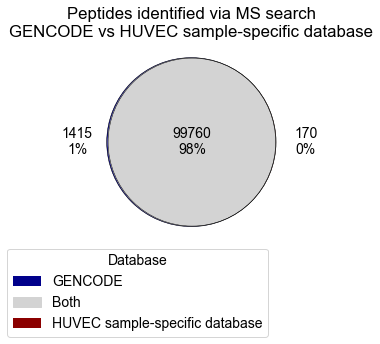

<Figure size 432x288 with 0 Axes>

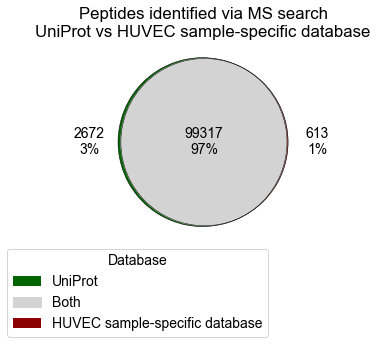

<Figure size 432x288 with 0 Axes>

In [3]:

def plot_venn_peptide_all_genes(peptides):
    gencode_peptide_set = set(peptides.gencode_peptide['Full Sequence'].unique())
    pacbio_hybrid_peptide_set = set(peptides.pacbio_hybrid_peptide['Full Sequence'].unique())
    uniprot_peptide_set = set(peptides.uniprot_peptide['Full Sequence'].unique())

    make_venn_diagram(gencode_peptide_set, pacbio_hybrid_peptide_set, gc_col, pb_col, 'GENCODE','HUVEC sample-specific database', 'Peptides','', 'venn_peptide_GENCODE_PacBio_Hybrid_full_space')

    make_venn_diagram(uniprot_peptide_set, pacbio_hybrid_peptide_set, un_col, pb_col, 'UniProt','HUVEC sample-specific database', 'Peptides','', 'venn_peptide_UniProt_PacBio_Hybrid_full_space')
plot_venn_peptide_all_genes(peptides)


### Gene overlap

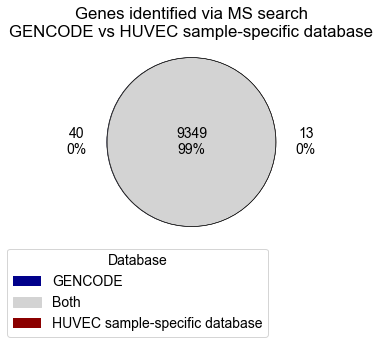

<Figure size 432x288 with 0 Axes>

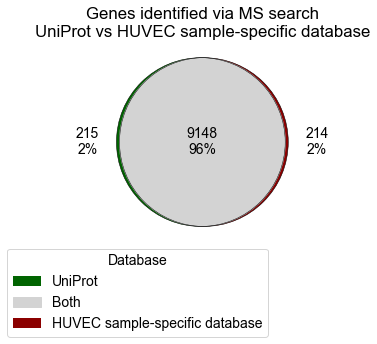

<Figure size 432x288 with 0 Axes>

In [4]:

# Plot the gene overlap diagrams for the protein groups 
protein_groups = data_loader.ProteinGroup()

def get_gene_set(protein_group):
    gene_set = set()
    for genes in protein_group['genes']:
        gene_set.update(genes)
    return gene_set

def plot_gene_venn_all_genes(protein_groups):
    gencode_gene_set = get_gene_set(protein_groups.gencode_protein_group)
    pacbio_hybrid_gene_set = get_gene_set(protein_groups.pacbio_hybrid_protein_group)
    uniprot_gene_set = get_gene_set(protein_groups.uniprot_protein_group)
    make_venn_diagram(gencode_gene_set, pacbio_hybrid_gene_set, gc_col, pb_col, 'GENCODE','HUVEC sample-specific database', 'Genes','', '04_venn_gene_GENCODE_PacBio_Hybrid_full_space')

    make_venn_diagram(uniprot_gene_set, pacbio_hybrid_gene_set, un_col, pb_col, 'UniProt','HUVEC sample-specific database', 'Genes', '','04_venn_gene_UniProt_PacBio_Hybrid_full_space')
plot_gene_venn_all_genes(protein_groups)
